# KDE Data Sampling

In [39]:
import pandas as pd
from matplotlib import pyplot as plt
import json
from pandas.io.json import json_normalize
from os import listdir
import os
from os.path import isfile, join
from pathlib import Path as pt
import numpy as np


In [3]:
path_in = "C:/Users/bench/PycharmProjects/BDA/data/data/70b3d500700016dA.txt"

## Getting sensor data and Event data

In [4]:
def txt_to_pd(path_in):
    print("#### reading "+ path_in +" in initial_df ###############")
    initial_df = pd.read_json(path_in, lines=True)

    # Relevante Daten in df
    df_garbage = pd.DataFrame(initial_df[1][0])
    dict_garbage = df_garbage.decoded_data[0]
    keys_garbage = dict_garbage.keys()
    values_garbage = dict_garbage.values()

    # Decoded last column of df containing the sensor Data
    df_decoded_data = json_normalize(df_garbage.decoded_data)

    # print(df_decoded_data)

    df_decoded_data["sensor_data.Height 1 (cm)"] = df_decoded_data["sensor_data.Height 1"].str.replace("cm", "").astype(
        int)
    # print(df_decoded_data)
    print("##################################Decoded################################")
    return df_decoded_data,df_garbage

In [10]:
df_decoded_data,df_garbage = txt_to_pd(path_in)
df_decoded_data

#### reading C:/Users/bench/PycharmProjects/BDA/data/data/70b3d500700016dA.txt in initial_df ###############


<ipython-input-4-15bd363a455a>:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_decoded_data = json_normalize(df_garbage.decoded_data)


##################################Decoded################################


,sensor_data.Status,sensor_data.Sensor ID,sensor_data.Events,sensor_data.Height 1,sensor_data.Height 2,sensor_data.Height 3,sensor_data.Height 4,sensor_data.Voltage,sensor_data.Temperature,sensor_data.Tilt,...,gws_data.fcnt,gws_data.port,gws_data.freq,gws_data.toa,gws_data.dr,gws_data.ack,gws_data.gws,gws_data.bat,gws_data.data,sensor_data.Height 1 (cm)
0,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,112 cm,112 cm,112 cm,112 cm,3620 mV,14 C,1 Degree,...,4097,2,867500000,123,SF8 BW125 4/5,False,"[{'rssi': -105, 'snr': 4.5, 'ts': 162049836037...",254,ffff22b8da1600700138383838700e01c1,112
1,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,112 cm,112 cm,112 cm,112 cm,3620 mV,17 C,1 Degree,...,4096,2,868100000,71,SF7 BW125 4/5,False,"[{'rssi': -110, 'snr': 1, 'ts': 1620494765501,...",254,ffff22b8da1600700138383838701101c0,112
2,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,108 cm,108 cm,108 cm,108 cm,3630 mV,15 C,0 Degree,...,4095,2,867700000,71,SF7 BW125 4/5,False,"[{'rssi': -107, 'snr': 7.5, 'ts': 162049115888...",254,ffff22b8da1600700136363636710f00bf,108
3,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,126 cm,126 cm,126 cm,126 cm,3630 mV,19 C,1 Degree,...,4094,2,867500000,71,SF7 BW125 4/5,False,"[{'rssi': -102, 'snr': 5, 'ts': 1620487559091,...",254,ffff22b8da160070013f3f3f3f711301be,126
4,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,118 cm,118 cm,118 cm,118 cm,3630 mV,20 C,0 Degree,...,4093,2,867900000,71,SF7 BW125 4/5,False,"[{'rssi': -113, 'snr': 5.2, 'ts': 162048395916...",254,ffff22b8da160070013b3b3b3b711400bd,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,8 cm,8 cm,8 cm,8 cm,3570 mV,12 C,2 Degree,...,2277,2,868300000,71,SF7 BW125 4/5,False,"[{'rssi': -98, 'snr': 6.2, 'ts': 1588992719129...",254,ffff22b8da16007001040404046b0c0292,8
7302,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,8 cm,8 cm,8 cm,8 cm,3570 mV,13 C,1 Degree,...,2276,2,867300000,71,SF7 BW125 4/5,False,"[{'rssi': -101, 'snr': 9.2, 'ts': 158898911931...",254,ffff22b8da16007001040404046b0d0191,8
7303,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,8 cm,8 cm,8 cm,8 cm,3570 mV,11 C,1 Degree,...,2275,2,867100000,71,SF7 BW125 4/5,False,"[{'rssi': -99, 'snr': 7.8, 'ts': 1588985519487...",254,ffff22b8da16007001040404046b0b0190,8
7304,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,8 cm,8 cm,8 cm,8 cm,3570 mV,11 C,1 Degree,...,2274,2,867700000,71,SF7 BW125 4/5,False,"[{'rssi': -99, 'snr': 8.5, 'ts': 1588981919681...",254,ffff22b8da16007001040404046b0b018f,8


In [18]:
df_garbage

,id,deveui,unix_time,client_id,created_at,decoded_data
0,4110576,70B3D500700016DA,1620498360377,FES Receiver,2021-05-08 20:26:00.596017,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
1,4110093,70B3D500700016DA,1620494765501,FES Receiver,2021-05-08 19:26:05.713448,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
2,4109607,70B3D500700016DA,1620491158880,FES Receiver,2021-05-08 18:25:59.323267,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
3,4109118,70B3D500700016DA,1620487559091,FES Receiver,2021-05-08 17:25:59.523137,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
4,4108627,70B3D500700016DA,1620483959154,FES Receiver,2021-05-08 16:25:59.577446,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
...,...,...,...,...,...,...
7301,598784,70B3D500700016DA,1588992719129,hi3,2020-05-09 04:51:59.293896,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
7302,598530,70B3D500700016DA,1588989119318,hi3,2020-05-09 03:51:59.488678,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
7303,598280,70B3D500700016DA,1588985519487,hi3,2020-05-09 02:51:59.658736,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
7304,598036,70B3D500700016DA,1588981919681,hi3,2020-05-09 01:51:59.856614,"{'sensor_data': {'Status': ['SS', 'Standalone'..."


### Time and Sensor Height in Focus (Batch of 100)

In [122]:
created_at=df_garbage.created_at.tolist()
sensor_height = df_decoded_data["sensor_data.Height 1 (cm)"]
x = np.array(sensor_height)[0:100]
x

array([112, 112, 108, 126, 118, 122, 134, 126, 122, 126, 124, 124, 126,
       126, 126, 124, 128, 124, 124, 128, 124, 132,  10,   6,  12,  12,
        12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,
        12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,
        12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,
        12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,
        12,  12,  12,  12,  12,  12,  12,  12,  12,  14,  12,  12,  12,
        12,  12,  12,  12,  12,  12,  12,  12,  16])

In [123]:
from sklearn.neighbors import KernelDensity


### loading the kernel and fitting the KDE for a 100-B sample of the sensor height

In [129]:
kde= KernelDensity(bandwidth = 0.005, kernel = "gaussian")
kde.fit(x[:,None])
Y = kde.sample(100)
Y = np.array(Y)
logprob = kde.score_samples(x[:, None])

In [130]:
logprob

array([ 0.46735583,  0.46735583, -0.22579135,  1.56596812, -0.22579135,
        0.46735583, -0.22579135,  1.56596812,  0.46735583,  1.56596812,
        1.56596812,  1.56596812,  1.56596812,  1.56596812,  1.56596812,
        1.56596812,  0.46735583,  1.56596812,  1.56596812,  0.46735583,
        1.56596812, -0.22579135, -0.22579135, -0.22579135,  4.07827374,
        4.07827374,  4.07827374,  4.07827374,  4.07827374,  4.07827374,
        4.07827374,  4.07827374,  4.07827374,  4.07827374,  4.07827374,
        4.07827374,  4.07827374,  4.07827374,  4.07827374,  4.07827374,
        4.07827374,  4.07827374,  4.07827374,  4.07827374,  4.07827374,
        4.07827374,  4.07827374,  4.07827374,  4.07827374,  4.07827374,
        4.07827374,  4.07827374,  4.07827374,  4.07827374,  4.07827374,
        4.07827374,  4.07827374,  4.07827374,  4.07827374,  4.07827374,
        4.07827374,  4.07827374,  4.07827374,  4.07827374,  4.07827374,
        4.07827374,  4.07827374,  4.07827374,  4.07827374,  4.07

In [131]:
a = np.sort(Y.flatten())[::-1]
a

array([134.00434215, 133.99876649, 128.00174481, 127.99951358,
       125.99874857, 125.99740735, 125.99381125, 125.99326938,
       124.00357297, 124.00041228, 123.99836284, 123.99426892,
       123.99034932, 122.00219814, 122.0011038 , 117.99910052,
       112.00151013, 111.9995247 , 111.99020095, 107.99278154,
        12.01048586,  12.00792885,  12.00762439,  12.00751093,
        12.00717109,  12.00707451,  12.00624464,  12.00573206,
        12.00572802,  12.00561828,  12.00448468,  12.00446698,
        12.00421283,  12.00380713,  12.00302199,  12.00281822,
        12.00273157,  12.00272301,  12.00266013,  12.00251322,
        12.00236238,  12.00205756,  12.00163274,  12.00155558,
        12.00152957,  12.00119438,  12.00026439,  12.00024576,
        12.00009709,  11.99996367,  11.99985849,  11.99976595,
        11.99972816,  11.99959487,  11.99920736,  11.99907532,
        11.99906596,  11.99903435,  11.99896646,  11.99887935,
        11.99862449,  11.99857422,  11.99829582,  11.99

#### Original DataSet

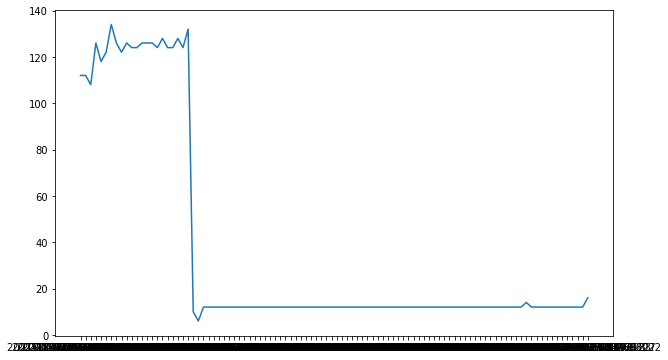

In [137]:
plt.figure(figsize=(10,6))
plt.plot(created_at[0:100],x)
plt.show()

#### KDE Sample sorted :/

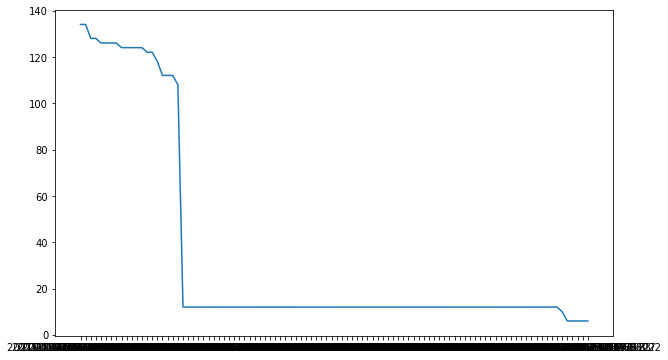

In [133]:
plt.figure(figsize=(10,6))
plt.plot(created_at[0:100],a)
plt.show()